# Machine Learning on Graphs (PageRank)
Mohamed SANAD

In this lab, we will learn to use and interpret [PageRank](https://en.wikipedia.org/wiki/PageRank) for graph analysis.

## Overview of the PageRank algorithm

<b>PageRank</b> is the graph analysis algorithm used by the Google search engine to rank web pages. PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

<b>Personalized PageRank</b>, an extension of the famous PageRank algorithm, revolutionizes the way we evaluate the importance of nodes in a graph, taking into account a user's specific preferences. Whereas traditional PageRank assigns a value to each node according to its overall importance in the network, Personalized PageRank goes a step further by adapting this value according to the user's particular interests or needs.

The essence of Personalized PageRank lies in the creation of a vector called the <i>“personalization vector”</i>. This vector reflects the user's preferences by assigning specific weights to certain nodes in the graph. These weights indicate the relative importance the user attaches to these nodes compared to others in the network. Next, we measure the importance of all the nodes in the graph in relation to these specific nodes.

Once the personalization vector has been defined, the Personalized PageRank algorithm propagates these preferences through the graph using an iterative process similar to that of standard PageRank process. At each iteration, weights are updated according to the links between nodes and the contribution of neighboring nodes, while taking into account the personalization vector. This process calculates a personalized score for each node, reflecting its relative importance in relation to the user's specific interests.

First, we define the probability matrix $P$ derived from the adjacency matrix $A$, where the element $A_{ij}$ is the weight of the link $(v_i,v_j)$, with $v_i,v_j ∈ V \text{(the set of nodes)}$.

##### In-degree and out-degree :

- $w_i^- = \sum_{j∈V}A_{ji}$ is the in-degree of the node $v_i$.
- $w_i^+ = \sum_{j∈V}A_{ij}$ is the out-degree of the node $v_i$.

##### Probability matrix :

The probability matrix $P$ is defined by :

$
P_{ij} = \left\{
    \begin{array}{ll}
        \frac{A_{ij}}{w_i^+} & \mbox{if } w_i^+ > 0 \\
        0 & \mbox{else}
    \end{array}
\right.
$

##### Dangling nodes :

If $w_i^+ = 0$, the node $v_i$ is called a <i>'dangling node'</i>. These nodes have no out-links.

We define the <i>'dangling nodes vector'</i> by :

$
a = 
\begin{bmatrix}
a_1 \\
a_2 \\
\vdots \\
a_n
\end{bmatrix}
\quad \text{where} \quad
a_i = \begin{cases} 
0 & \text{if } w_i^+ > 0 \\
1 & \text{otherwise}
\end{cases}
$

##### Personalization vector :

Finally, we have the <i>'personalization vector'</i> :

$
v = 
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix}
\quad \text{where} \quad
\sum_{j∈V}v_j = 1
$

In the normal PageRank algorithm, all the elements $v_j$ are equal to $\frac{1}{n}$.

##### Damping factor α :

The PageRank theory holds that an imaginary surfer who is randomly clicking on links will eventually stop clicking. The probability, at any step, that the person will continue following links is a damping factor α. The probability that they instead jump to any random page is 1 - α.

##### PageRank formula :

The probability matrix $P$ is not stochastic since the sum of elements is not equal to 1 in the rows corresponding to dangling nodes. But, the following matrix $P'$ is stochastic : $P' = P + a.v^T$.

The term $a.v^T$ is used to replace these lines with the <i>“personalization vector”</i>, the sum of whose elements is 1.

The PageRank vector, at iteration t, is defined by :

$$ x^t = α.x^{t-1}.P' + (1-α).v^T $$

## Scikit-network

Scikit-network is a Python library for analyzing large graphs such as social networks, web graphs and relational data, developed since May 2018 at Télécom Paris.

The library offers state-of-the-art algorithms for processing these graphs, understanding their structure, extracting the main clusters and the most representative nodes. It also includes visualization tools for exporting graph vector images in SVG format.

You need to install [scikit-network](https://scikit-network.readthedocs.io/en/latest/) if not yet done:

In [1]:
# !pip install scikit-network

## Import

In [2]:
from IPython.display import SVG

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse
from tabulate import tabulate

In [4]:
from sknetwork.data import load_netset, linear_graph
from sknetwork.ranking import PageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following real graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (weighted graph)
* WikiVitals (directed graph + bipartite graph)

In [5]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## 1. Linear graph

We start with the following simple graph:

In [6]:
n = 10
graph = linear_graph(n, metadata=True)
adjacency = graph.adjacency
position = graph.position

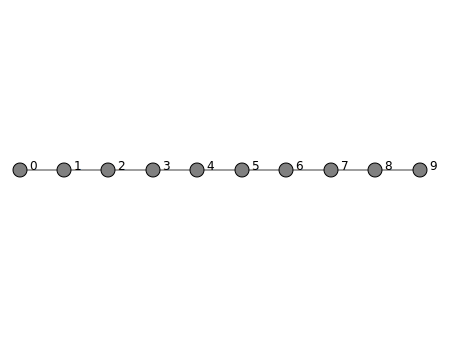

In [7]:
image = svg_graph(adjacency, position, names=np.arange(n))
SVG(image)

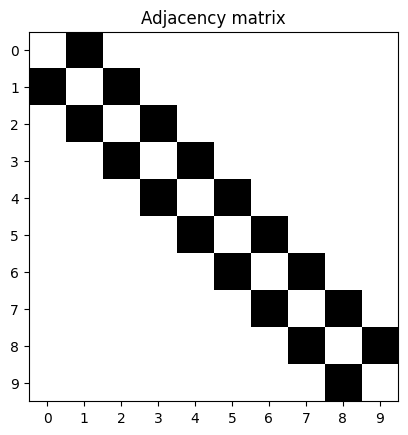

In [8]:
plt.imshow(adjacency.toarray(), cmap='Greys',  interpolation='nearest')
plt.xticks(range(10))
plt.yticks(range(10))
plt.title("Adjacency matrix")

plt.show()

## To do

* What are the three best ranked nodes?<br> Try with different values of $\alpha \in [0,1)$ and interpret the results.
* What is the **exact** PageRank vector when $\alpha=1$?<br> You need to calculate it!
* Compute the Personalized PageRank vector starting from nodes 0 and 2.<br> What is the best ranked node?

In [9]:
# alpha = 0.5
pagerank = PageRank(damping_factor=0.5, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
nodes_scores = [(i, score) for i, score in enumerate(scores)]
top_three_nodes = [item[0] for item in sorted(nodes_scores, key=lambda x: x[1], reverse=True)[:3]]
print(tabulate(nodes_scores, headers=["Node", "score"], tablefmt="grid"))
print("\nThe three best ranked nodes are : ", top_three_nodes)

+--------+-----------+
|   Node |     score |
+========+===========+
|      0 | 0.0788679 |
+--------+-----------+
|      1 | 0.115472  |
+--------+-----------+
|      2 | 0.104151  |
+--------+-----------+
|      3 | 0.101132  |
+--------+-----------+
|      4 | 0.100377  |
+--------+-----------+
|      5 | 0.100377  |
+--------+-----------+
|      6 | 0.101132  |
+--------+-----------+
|      7 | 0.104151  |
+--------+-----------+
|      8 | 0.115472  |
+--------+-----------+
|      9 | 0.0788679 |
+--------+-----------+

The three best ranked nodes are :  [1, 8, 2]


In [10]:
# alpha = 0.1
pagerank = PageRank(damping_factor=0.1, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
nodes_scores = [(i, score) for i, score in enumerate(scores)]
top_three_nodes = [item[0] for item in sorted(nodes_scores, key=lambda x: x[1], reverse=True)[:3]]
print(tabulate(nodes_scores, headers=["Node", "score"], tablefmt="grid"))
print("\nThe three best ranked nodes are : ", top_three_nodes)

+--------+-----------+
|   Node |     score |
+========+===========+
|      0 | 0.0952267 |
+--------+-----------+
|      1 | 0.104534  |
+--------+-----------+
|      2 | 0.100227  |
+--------+-----------+
|      3 | 0.100011  |
+--------+-----------+
|      4 | 0.100001  |
+--------+-----------+
|      5 | 0.100001  |
+--------+-----------+
|      6 | 0.100011  |
+--------+-----------+
|      7 | 0.100227  |
+--------+-----------+
|      8 | 0.104534  |
+--------+-----------+
|      9 | 0.0952267 |
+--------+-----------+

The three best ranked nodes are :  [1, 8, 2]


In [11]:
# alpha = 0.9
pagerank = PageRank(damping_factor=0.9, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
nodes_scores = [(i, score) for i, score in enumerate(scores)]
top_three_nodes = [item[0] for item in sorted(nodes_scores, key=lambda x: x[1], reverse=True)[:3]]
print(tabulate(nodes_scores, headers=["Node", "score"], tablefmt="grid"))
print("\nThe three best ranked nodes are : ", top_three_nodes)

+--------+-----------+
|   Node |     score |
+========+===========+
|      0 | 0.0618185 |
+--------+-----------+
|      1 | 0.115152  |
+--------+-----------+
|      2 | 0.110035  |
+--------+-----------+
|      3 | 0.107147  |
+--------+-----------+
|      4 | 0.105848  |
+--------+-----------+
|      5 | 0.105848  |
+--------+-----------+
|      6 | 0.107147  |
+--------+-----------+
|      7 | 0.110035  |
+--------+-----------+
|      8 | 0.115152  |
+--------+-----------+
|      9 | 0.0618185 |
+--------+-----------+

The three best ranked nodes are :  [1, 8, 2]


In [12]:
def my_pagerank(adjacency, tol, alpha):
    N = adjacency.shape[0] # Number of nodes
    tol = 1.0e-10 # Tolerance
    alpha = 0.5 # Damping factor

    A = adjacency.astype(float) # adjacency matrix
    S = np.array(A.sum(axis=1)).flatten() # Out-degrees
    S[S != 0] = 1 / S[S != 0] # 1 / out-degrees
    D = sparse.diags(S) # 1 / out-degrees in diagonal matrix
    P = D @ A # Probability matrix

    dangling_nodes = np.where(S==0)[0] # The indices of the dangling nodes

    # Personalization vector : all the elements in the personalization vector are equal to 1/n
    p = np.repeat(1.0 / N, N)

    x = np.repeat(1.0 / N, N) # Start vector
    err = N * tol # We initialize the error

    # Power Iteration method
    while err >= N * tol:
        old_x = x
        x = alpha * (x @ P + sum(x[dangling_nodes]) * p) + (1 - alpha) * p
        err = np.linalg.norm(x - old_x, ord=1)
        
    return x

In [13]:
# Test this implementation
for alpha in np.arange(0.1, 1.0, 0.1):
    scores_1 = my_pagerank(adjacency, 1.0e-10, 0.5)
    scores_2 = PageRank(damping_factor=0.5, solver='lanczos').fit_transform(adjacency)
    are_equal = np.allclose(scores_1, scores_2, atol=1.0e-6)
    print(f"Are the two arrays equal for alpha = {alpha:.1f} ? {are_equal}")

Are the two arrays equal for alpha = 0.1 ? True
Are the two arrays equal for alpha = 0.2 ? True
Are the two arrays equal for alpha = 0.3 ? True
Are the two arrays equal for alpha = 0.4 ? True
Are the two arrays equal for alpha = 0.5 ? True
Are the two arrays equal for alpha = 0.6 ? True
Are the two arrays equal for alpha = 0.7 ? True
Are the two arrays equal for alpha = 0.8 ? True
Are the two arrays equal for alpha = 0.9 ? True


In [14]:
# PageRank vector for alpha = 1 :
scores = my_pagerank(adjacency, 1.0e-10, 1)
nodes_scores = [(i, score) for i, score in enumerate(scores)]
top_three_nodes = [item[0] for item in sorted(nodes_scores, key=lambda x: x[1], reverse=True)[:3]]
print(tabulate(nodes_scores, headers=["Node", "score"], tablefmt="grid"))
print("\nThe three best ranked nodes are : ", top_three_nodes)

+--------+-----------+
|   Node |     score |
+========+===========+
|      0 | 0.0788679 |
+--------+-----------+
|      1 | 0.115472  |
+--------+-----------+
|      2 | 0.104151  |
+--------+-----------+
|      3 | 0.101132  |
+--------+-----------+
|      4 | 0.100377  |
+--------+-----------+
|      5 | 0.100377  |
+--------+-----------+
|      6 | 0.101132  |
+--------+-----------+
|      7 | 0.104151  |
+--------+-----------+
|      8 | 0.115472  |
+--------+-----------+
|      9 | 0.0788679 |
+--------+-----------+

The three best ranked nodes are :  [1, 8, 2]


In [15]:
def my_personalized_pagerank(adjacency, tol, alpha, start_nodes):
    N = adjacency.shape[0] # Number of nodes
    nodelist = np.arange(N) # Nodelist
    tol = 1.0e-10 # Tolerance
    alpha = 0.5 # Damping factor

    A = adjacency.astype(float) # adjacency matrix
    S = np.array(A.sum(axis=1)).flatten() # Out-degrees
    S[S != 0] = 1 / S[S != 0] # 1 / out-degrees
    D = sparse.diags(S) # 1 / out-degrees in diagonal matrix
    P = D @ A # Probability matrix

    dangling_nodes = np.where(S==0)[0] # The indices of the dangling nodes

    # Personalization vector : all the elements in the personalization vector are equal to 1/n
    personalization = {node:1.0/len(start_nodes) if node in start_nodes else 0 for node in nodelist}
    p = np.array([personalization.get(n) for n in nodelist], dtype=float)

    x = np.repeat(1.0 / N, N) # Start vector
    err = N * tol # We initialize the error

    # Power Iteration method
    while err >= N * tol:
        old_x = x
        x = alpha * (x @ P + sum(x[dangling_nodes]) * p) + (1 - alpha) * p
        err = np.linalg.norm(x - old_x, ord=1)
        
    return x

In [16]:
# Personalized PageRank vector for alpha = 0.5, starting from nodes 0 and 2 :
scores = my_personalized_pagerank(adjacency, 1.0e-10, 0.5, [0,2])
nodes_scores = [(i, score) for i, score in enumerate(scores)]
top_three_nodes = [item[0] for item in sorted(nodes_scores, key=lambda x: x[1], reverse=True)[:3]]
print(tabulate(nodes_scores, headers=["Node", "score"], tablefmt="grid"))
print("\nThe three best ranked nodes are : ", top_three_nodes)

+--------+-------------+
|   Node |       score |
+========+=============+
|      0 | 0.309401    |
+--------+-------------+
|      1 | 0.237604    |
+--------+-------------+
|      2 | 0.331615    |
+--------+-------------+
|      3 | 0.088856    |
+--------+-------------+
|      4 | 0.0238089   |
+--------+-------------+
|      5 | 0.00637974  |
+--------+-------------+
|      6 | 0.00171003  |
+--------+-------------+
|      7 | 0.000460394 |
+--------+-------------+
|      8 | 0.000131541 |
+--------+-------------+
|      9 | 3.28853e-05 |
+--------+-------------+

The three best ranked nodes are :  [2, 0, 1]


The best ranked node is 2.

## 2. Openflights


We now work on Openflights, the graph of daily flights between interational airports.

In [17]:
graph = openflights

In [18]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [19]:
# Number of nodes
num_nodes = adjacency.shape[0]

# Number of edges
if not (adjacency != adjacency.T).nnz:  # Check if the graph is undirected
    num_edges = adjacency.nnz // 2  # Undirected graph, divide by 2
    print("The graph is undirected")
else:
    num_edges = adjacency.nnz  # Directed graph
    print("The graph is directed")

print("Number of nodes : ", num_nodes)
print("Number of edges : ", num_edges)

The graph is undirected
Number of nodes :  3097
Number of edges :  18193


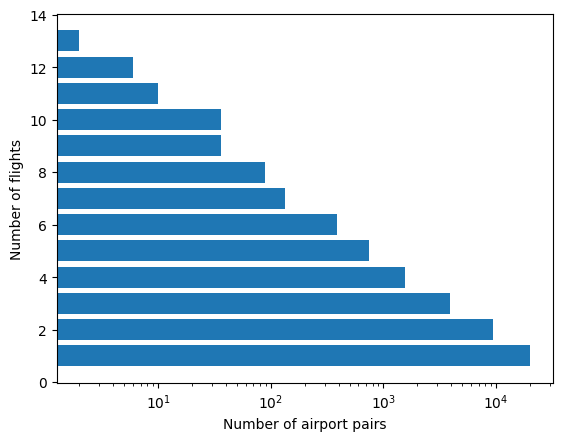

In [20]:
# daily number of flights
x, y = np.unique(adjacency.data, return_counts=True)
plt.barh(x, y)
plt.xscale('log')
plt.xlabel('Number of airport pairs')
plt.ylabel('Number of flights')
plt.show()

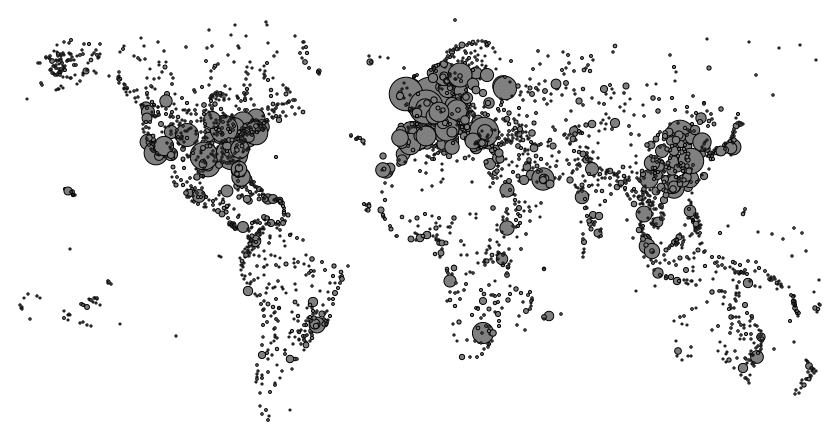

In [21]:
# edges not displayed
# node size = daily number of flights
image = svg_graph(adjacency,
                  position,
                  width=800,
                  height=400,
                  display_node_weight=True,
                  display_edges=False)

SVG(image)

## To do

* Show the same world map with PageRank scores.<br>
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Show the world map with Personalized PageRank scores, starting from **Beijing** international airport.
* List the corresponding 10 best ranked airports.

In [22]:
# alpha = 0.5
pagerank = PageRank(damping_factor=0.5, solver='lanczos')
scores = pagerank.fit_transform(adjacency)

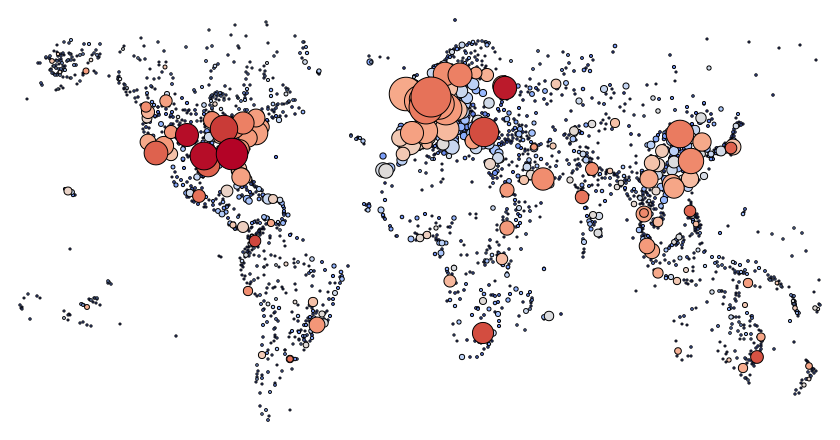

In [23]:
image = svg_graph(adjacency,
                  position,
                  width=800,
                  height=400,
                  scores=np.log(scores),
                  node_order=np.argsort(scores),
                  display_node_weight=True,
                  display_edges=False)

SVG(image)

In [24]:
# The 10 best ranked airports (PageRank)
airports_scores = [(names[i], score) for i, score in enumerate(scores)]
top_ten_ranked_airports = sorted(airports_scores, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_ranked_airports, headers=["Airport", "PageRank score"], tablefmt="grid"))

+--------------------------------------------------+------------------+
| Airport                                          |   PageRank score |
+==================================================+==================+
| Hartsfield Jackson Atlanta International Airport |       0.00359861 |
+--------------------------------------------------+------------------+
| Denver International Airport                     |       0.00351822 |
+--------------------------------------------------+------------------+
| Dallas Fort Worth International Airport          |       0.00351819 |
+--------------------------------------------------+------------------+
| Domodedovo International Airport                 |       0.00338269 |
+--------------------------------------------------+------------------+
| Chicago O'Hare International Airport             |       0.0030693  |
+--------------------------------------------------+------------------+
| El Dorado International Airport                  |       0.002

In [25]:
# The 10 airports of highest traffic
traffic = np.array(adjacency.sum(axis=1)).flatten()
airports_traffic = [(names[i], nb_flights) for i, nb_flights in enumerate(traffic)]
top_ten_airports_traffic = sorted(airports_traffic, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_airports_traffic, headers=["Airport", "Traffic"], tablefmt="grid"))

+--------------------------------------------------+-----------+
| Airport                                          |   Traffic |
+==================================================+===========+
| Amsterdam Airport Schiphol                       |       492 |
+--------------------------------------------------+-----------+
| Charles de Gaulle International Airport          |       413 |
+--------------------------------------------------+-----------+
| Dublin Airport                                   |       408 |
+--------------------------------------------------+-----------+
| Munich International Airport                     |       386 |
+--------------------------------------------------+-----------+
| Hartsfield Jackson Atlanta International Airport |       382 |
+--------------------------------------------------+-----------+
| London Gatwick Airport                           |       376 |
+--------------------------------------------------+-----------+
| Frankfurt am Main Inter

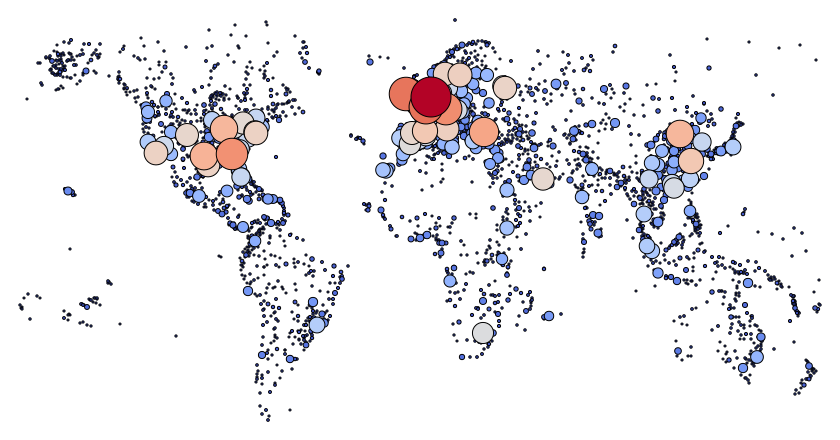

In [26]:
image = svg_graph(adjacency,
                  position,
                  width=800,
                  height=400,
                  scores=traffic,
                  node_order=np.argsort(traffic),
                  display_node_weight=True,
                  display_edges=False)

SVG(image)

When we compare the 10 best ranked airports with the 10 airports of highest traffic, we notice that there are some differences. In fact, an airport with a high traffic doesn't mean that this airport is connected with other important airports.

In [27]:
# Personalized PageRank scores, starting from Beijing international airport (alpha = 0.5)
start_nodes = list(np.where(names == 'Beijing Capital International Airport')[0])
scores = my_personalized_pagerank(adjacency, 1.0e-10, 0.5, start_nodes)

# The 10 best ranked airports (PageRank)
airports_scores = [(names[i], score) for i, score in enumerate(scores)]
top_ten_ranked_airports = sorted(airports_scores, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_ranked_airports, headers=["Airport", "PageRank score"], tablefmt="grid"))

+-------------------------------------------------+------------------+
| Airport                                         |   PageRank score |
+=================================================+==================+
| Beijing Capital International Airport           |       0.511968   |
+-------------------------------------------------+------------------+
| Zhengzhou Xinzheng International Airport        |       0.00799594 |
+-------------------------------------------------+------------------+
| Shanghai Pudong International Airport           |       0.00672772 |
+-------------------------------------------------+------------------+
| Wuhan Tianhe International Airport              |       0.00641756 |
+-------------------------------------------------+------------------+
| Guangzhou Baiyun International Airport          |       0.00630519 |
+-------------------------------------------------+------------------+
| Kunming Changshui International Airport         |       0.00607965 |
+-----

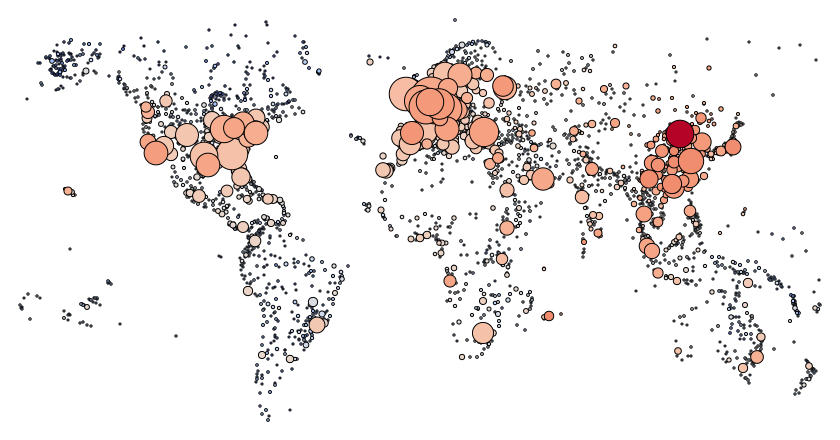

In [28]:
image = svg_graph(adjacency,
                  position,
                  width=800,
                  height=400,
                  scores=np.log(scores),
                  node_order=np.argsort(scores),
                  display_node_weight=True,
                  display_edges=False)

SVG(image)

## 3. Wikivitals

We now consider Wikivitals, the graph of hyperlinks between [vital articles](https://en.wikipedia.org/wiki/Wikipedia:Vital_articles/Level/4) of Wikipedia.

In [29]:
graph = wikivitals

In [30]:
adjacency = graph.adjacency
names = graph.names

In [31]:
# Number of nodes
num_nodes = adjacency.shape[0]

# Number of edges
if not (adjacency != adjacency.T).nnz:  # Check if the graph is undirected
    num_edges = adjacency.nnz // 2  # Undirected graph, divide by 2
    print("The graph is undirected")
else:
    num_edges = adjacency.nnz  # Directed graph
    print("The graph is directed")

print("Number of nodes : ", num_nodes)
print("Number of edges : ", num_edges)

The graph is directed
Number of nodes :  10011
Number of edges :  824999


## To do

* List the 10 best ranked articles.
* Compare with the 10 articles of highest out-degrees and the 10 articles of highest in-degrees.<br>Interpret the results.

In [32]:
# alpha = 0.5
pagerank = PageRank(damping_factor=0.5, solver='lanczos')
scores = pagerank.fit_transform(adjacency)

# The 10 best ranked articles (PageRank)
articles_scores = [(names[i], score) for i, score in enumerate(scores)]
top_ten_ranked_articles = sorted(articles_scores, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_ranked_articles, headers=["Article", "PageRank score"], tablefmt="grid"))

+------------------------------+------------------+
| Article                      |   PageRank score |
+==============================+==================+
| United States                |      0.00133654  |
+------------------------------+------------------+
| The New York Times           |      0.00125453  |
+------------------------------+------------------+
| World War II                 |      0.00119376  |
+------------------------------+------------------+
| Geographic coordinate system |      0.00103052  |
+------------------------------+------------------+
| Latin                        |      0.000985905 |
+------------------------------+------------------+
| China                        |      0.000936156 |
+------------------------------+------------------+
| India                        |      0.00091428  |
+------------------------------+------------------+
| United Kingdom               |      0.000867124 |
+------------------------------+------------------+
| France    

In [33]:
# The 10 articles of highest out-degrees
out_degrees = np.array(adjacency.sum(axis=1)).flatten()
articles_out_degrees = [(names[i], out_degree) for i, out_degree in enumerate(out_degrees)]
top_ten_articles_out_degrees = sorted(articles_out_degrees, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_articles_out_degrees, headers=["Article", "Out-degree"], tablefmt="grid"))

+----------------+--------------+
| Article        |   Out-degree |
+================+==============+
| Europe         |          680 |
+----------------+--------------+
| Africa         |          576 |
+----------------+--------------+
| History of art |          574 |
+----------------+--------------+
| France         |          566 |
+----------------+--------------+
| Human history  |          542 |
+----------------+--------------+
| Latin America  |          542 |
+----------------+--------------+
| South America  |          536 |
+----------------+--------------+
| Asia           |          495 |
+----------------+--------------+
| Biology        |          453 |
+----------------+--------------+
| Human          |          451 |
+----------------+--------------+


In [34]:
# The 10 articles of highest in-degrees
in_degrees = np.array(adjacency.sum(axis=0)).flatten()
articles_in_degrees = [(names[i], in_degree) for i, in_degree in enumerate(in_degrees)]
top_ten_articles_in_degrees = sorted(articles_in_degrees, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_articles_in_degrees, headers=["Article", "In-degree"], tablefmt="grid"))

+------------------------------+-------------+
| Article                      |   In-degree |
+==============================+=============+
| United States                |        1993 |
+------------------------------+-------------+
| The New York Times           |        1684 |
+------------------------------+-------------+
| World War II                 |        1658 |
+------------------------------+-------------+
| India                        |        1513 |
+------------------------------+-------------+
| China                        |        1493 |
+------------------------------+-------------+
| France                       |        1390 |
+------------------------------+-------------+
| Geographic coordinate system |        1363 |
+------------------------------+-------------+
| United Kingdom               |        1305 |
+------------------------------+-------------+
| Latin                        |        1212 |
+------------------------------+-------------+
| Australia  

We can see that the best ranked articles (PageRank) and the articles of highest in-degrees are quite similar. That's because the assumption of the PageRank algorithm is that the most important nodes receive links from other important nodes.

## To do
* List the 10 best ranked articles for the Personalized PageRank starting from **Pablo Picasso**. 
* List the 10 best ranked articles for the Personalized PageRank starting from **Cat** and **Dog**.
* To get more specific results, propose another method based on the difference between 2 PageRank vectors.

In [35]:
# Personalized PageRank scores, starting from Pablo Picasso (alpha = 0.5)
start_nodes = list(np.where(names == 'Pablo Picasso')[0])
scores = my_personalized_pagerank(adjacency, 1.0e-10, 0.5, start_nodes)

# The 10 best ranked articles (PageRank)
articles_scores = [(names[i], score) for i, score in enumerate(scores)]
top_ten_ranked_articles = sorted(articles_scores, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_ranked_articles, headers=["Article", "PageRank score"], tablefmt="grid"))

+----------------------+------------------+
| Article              |   PageRank score |
+======================+==================+
| Pablo Picasso        |       0.501124   |
+----------------------+------------------+
| Modernism            |       0.00240183 |
+----------------------+------------------+
| Paris                |       0.00239698 |
+----------------------+------------------+
| Museum of Modern Art |       0.00228795 |
+----------------------+------------------+
| World War I          |       0.00225236 |
+----------------------+------------------+
| Cubism               |       0.00220357 |
+----------------------+------------------+
| World War II         |       0.00214598 |
+----------------------+------------------+
| Impressionism        |       0.0021014  |
+----------------------+------------------+
| Surrealism           |       0.00210096 |
+----------------------+------------------+
| Symbolism (arts)     |       0.0020886  |
+----------------------+--------

In [36]:
# Personalized PageRank scores, starting from Cat and Dog (alpha = 0.5)
start_nodes = list(np.where(np.isin(names, ['Cat', 'Dog']))[0])
scores = my_personalized_pagerank(adjacency, 1.0e-10, 0.5, start_nodes)

# The 10 best ranked articles (PageRank)
articles_scores = [(names[i], score) for i, score in enumerate(scores)]
top_ten_ranked_articles = sorted(articles_scores, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_ranked_articles, headers=["Article", "PageRank score"], tablefmt="grid"))

+--------------------+------------------+
| Article            |   PageRank score |
+====================+==================+
| Cat                |       0.252089   |
+--------------------+------------------+
| Dog                |       0.252016   |
+--------------------+------------------+
| Taxonomy (biology) |       0.00344152 |
+--------------------+------------------+
| Animal             |       0.00339161 |
+--------------------+------------------+
| Mammal             |       0.00329661 |
+--------------------+------------------+
| Chordate           |       0.00317474 |
+--------------------+------------------+
| Carnivora          |       0.00302575 |
+--------------------+------------------+
| Leopard            |       0.00300223 |
+--------------------+------------------+
| Fox                |       0.00300129 |
+--------------------+------------------+
| Pinniped           |       0.00300068 |
+--------------------+------------------+


In [37]:
# Personalized PageRank vector, starting from Cat (alpha = 0.5)
cat_start_nodes = list(np.where(names == 'Cat')[0])
cat_scores = my_personalized_pagerank(adjacency, 1.0e-10, 0.5, cat_start_nodes)

# Personalized PageRank vector, starting from Dog (alpha = 0.5)
dog_start_nodes = list(np.where(names == 'Dog')[0])
dog_scores = my_personalized_pagerank(adjacency, 1.0e-10, 0.5, dog_start_nodes)


# Difference between the two vectors
diff_scores = cat_scores - dog_scores

# Nodes with significant positive values indicate articles that 
# are much more important when starting from "Cat" than from "Dog".
articles_scores = [(names[i], score) for i, score in enumerate(diff_scores)]
top_ten_ranked_articles = sorted(articles_scores, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_ranked_articles, headers=["Article", "PR(Cat) - PR(Dog)"], tablefmt="grid"))

+------------------+---------------------+
| Article          |   PR(Cat) - PR(Dog) |
+==================+=====================+
| Cat              |          0.497051   |
+------------------+---------------------+
| Siamese cat      |          0.00241841 |
+------------------+---------------------+
| Roman Empire     |          0.00211536 |
+------------------+---------------------+
| Middle Ages      |          0.00205559 |
+------------------+---------------------+
| Herodotus        |          0.00205085 |
+------------------+---------------------+
| Aristotle        |          0.00203754 |
+------------------+---------------------+
| Sardinia         |          0.00201509 |
+------------------+---------------------+
| Cyprus           |          0.0020116  |
+------------------+---------------------+
| Ovid             |          0.00201101 |
+------------------+---------------------+
| Swedish language |          0.00200645 |
+------------------+---------------------+


As expected, we have only articles related to cats.

## To do

Propose a method to get the 10 most representative articles of each category (Arts, Biology, ...)

In [38]:
labels = graph.labels
names_labels = graph.names_labels

In [39]:
print(names_labels)

['Arts' 'Biological and health sciences' 'Everyday life' 'Geography'
 'History' 'Mathematics' 'People' 'Philosophy and religion'
 'Physical sciences' 'Society and social sciences' 'Technology']


In [40]:
# alpha = 0.5
pagerank = PageRank(damping_factor=0.5, solver='lanczos')
scores = pagerank.fit_transform(adjacency)

articles_categories_scores = [(names[i], names_labels[labels[i]], score) for i, score in enumerate(scores)]

top_articles_by_category = {}
for article, category, score in articles_categories_scores:
    if category not in top_articles_by_category:
        top_articles_by_category[category] = []
    top_articles_by_category[category].append((article, score))

top_articles_by_category = {category: sorted(articles, key=lambda x: x[1], reverse=True)[:10] 
                            for category, articles in top_articles_by_category.items()}

for category, top_articles in top_articles_by_category.items():
    print(f"\033[1mCategory: {category}\033[0m")
    print(tabulate([[article, score] for article, score in top_articles],
                   headers=["Article", "PageRank score"], tablefmt="grid"))
    print("\n")

Category: Mathematics
+------------------------+------------------+
| Article                |   PageRank score |
+========================+==================+
| Real number            |      0.0002334   |
+------------------------+------------------+
| Statistics             |      0.000214403 |
+------------------------+------------------+
| Function (mathematics) |      0.000212113 |
+------------------------+------------------+
| Mathematics            |      0.000209665 |
+------------------------+------------------+
| Geometry               |      0.00020279  |
+------------------------+------------------+
| Complex number         |      0.000189908 |
+------------------------+------------------+
| Set (mathematics)      |      0.000183807 |
+------------------------+------------------+
| Algorithm              |      0.000178731 |
+------------------------+------------------+
| Integer                |      0.000178063 |
+------------------------+------------------+
| Calculus  

## To do

Compare previous results to those obtained with the textual content of articles. 

In [41]:
biadjacency = graph.biadjacency
words = graph.names_col

In [42]:
num_articles, num_words = biadjacency.shape

print("Number of articles : ", num_articles)
print("Number of words    : ", num_words)

Number of articles :  10011
Number of words    :  37845


Each entry in the biadjacency matrix represents how many times a word (column) appears in an article (row). This is essentially the term frequency (TF).

In [43]:
# Step 1: Calculate Document Frequency (DF) for each word
df = np.array((biadjacency > 0).sum(axis=0)).flatten()  # Counts in how many articles each word appears

# Step 2: Calculate IDF for each word
idf  = np.log((num_articles + 1) / (df + 1)) # Adding 1 to avoid division by zero

# Step 3: Apply IDF to the biadjacency matrix (Term Frequency * IDF)
tf_idf_matrix = biadjacency.multiply(idf)  # Element-wise multiplication of TF by IDF

# Step 4: Sum the TF-IDF scores for each article (row) to get the total score per article
scores = np.array(tf_idf_matrix.sum(axis=1)).flatten()

# Step 5: Rank the articles by their TF-IDF scores (descending order) and display the top 10 articles
articles_scores = [(names[i], score) for i, score in enumerate(scores)]
top_ten_ranked_articles = sorted(articles_scores, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_ranked_articles, headers=["Article", "TF-IDF score"], tablefmt="grid"))

+--------------------------------------+----------------+
| Article                              |   TF-IDF score |
+======================================+================+
| Lyndon B. Johnson                    |        2808.59 |
+--------------------------------------+----------------+
| Eastern Bloc                         |        2798.99 |
+--------------------------------------+----------------+
| Vietnam War                          |        2682.79 |
+--------------------------------------+----------------+
| World War I                          |        2589.49 |
+--------------------------------------+----------------+
| Soviet Union                         |        2532.87 |
+--------------------------------------+----------------+
| Italian Wars                         |        2512.81 |
+--------------------------------------+----------------+
| Spanish conquest of the Aztec Empire |        2482.89 |
+--------------------------------------+----------------+
| History of G

- <b>PageRank :</b>
<br>PageRank is a graph-based ranking algorithm initially designed for web pages. It evaluates the importance of nodes (articles) based on the structure of the graph and the connectivity between nodes. It assigns higher ranks to articles that are linked by other highly ranked articles. PageRank doesn’t directly consider the content or frequency of words in the articles; it relies on the relationships between articles in the graph.


- <b>TF-IDF :</b>
<br>TF-IDF is a text-based ranking method that evaluates the importance of words in an article relative to how common or rare those words are across the entire corpus. It computes how frequently words appear in each article (TF) and adjusts for how common those words are across all articles (IDF). Articles that contain more “informative” words (i.e., words that are frequent in the article but rare across the corpus) get higher scores. To summarize, TF-IDF ranks articles based on their content, with no consideration of relationships or links between articles. It only looks at the words present in each article.


#### Why the Results Differ:
- <b>PageRank :</b> If an article is highly connected to other important articles in the graph, it will receive a high PageRank score, regardless of its content.


- <b>TF-IDF :</b> Articles with rare but significant words will score higher, even if they don’t have many connections to other articles.



#### Combining Both Approaches :
We want to integrate both the connectivity of articles (PageRank) and the content relevance (TF-IDF) by creating a hybrid ranking system where both scores contribute to the final ranking.

In [44]:
# PageRank
pagerank = PageRank(damping_factor=0.5, solver='lanczos')
pagerank_scores = pagerank.fit_transform(adjacency)

# TF-IDF
df = np.array((biadjacency > 0).sum(axis=0)).flatten()
idf  = np.log((num_articles + 1) / (df + 1))
tf_idf_matrix = biadjacency.multiply(idf)
tf_idf_scores = np.array(tf_idf_matrix.sum(axis=1)).flatten()

# Normalize the scores from both methods
pagerank_scores = (pagerank_scores - min(pagerank_scores)) / (max(pagerank_scores) - min(pagerank_scores))
tf_idf_scores = (tf_idf_scores - min(tf_idf_scores)) / (max(tf_idf_scores) - min(tf_idf_scores))

# Combined scores
combined_scores = 0.5 * pagerank_scores + 0.5 * tf_idf_scores

# Rank the articles by their combined scores (descending order) and display the top 10 articles
articles_scores = [(names[i], score) for i, score in enumerate(combined_scores)]
top_ten_ranked_articles = sorted(articles_scores, key=lambda x: x[1], reverse=True)[:10]
print(tabulate(top_ten_ranked_articles, headers=["Article", "Combined score"], tablefmt="grid"))

+--------------------+------------------+
| Article            |   Combined score |
+====================+==================+
| World War II       |         0.76566  |
+--------------------+------------------+
| World War I        |         0.728811 |
+--------------------+------------------+
| United States      |         0.684599 |
+--------------------+------------------+
| Soviet Union       |         0.674174 |
+--------------------+------------------+
| France             |         0.639797 |
+--------------------+------------------+
| India              |         0.631408 |
+--------------------+------------------+
| Italy              |         0.621862 |
+--------------------+------------------+
| China              |         0.590688 |
+--------------------+------------------+
| The New York Times |         0.575612 |
+--------------------+------------------+
| Vietnam War        |         0.556405 |
+--------------------+------------------+
